In [ ]:
!pip install pandas openpyxl matplotlib seaborn scikit-learn


In [ ]:
# prompt: import pandas as pd

import pandas as pd



In [ ]:
file_path="/content/HousePricePrediction.xlsx"
df=pd.read_excel(file_path, sheet_name="Sheet1")

In [ ]:
df.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


# **Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
# MSZoning (Categorical)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

# (Numerical)

df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())



# **Exploratory Data Analysis (EDA)**
explore the dataset to understand patterns, trends, and relationships between features.

In [ ]:
train_data = df[df['SalePrice'].notnull()]  # Training set (SalePrice is known)
test_data = df[df['SalePrice'].isnull()]    # Test set (SalePrice is missing)


In [ ]:
train_data.describe()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,421.610009,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,364.750000,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,729.500000,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,1094.250000,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,1459.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


 # **Visualizing SalePrice Distribution**  :analyze the distribution of house prices.


In [ ]:
 # Plot the Distribution of SalePrice: to check if house prices are normally distributed or skewed:



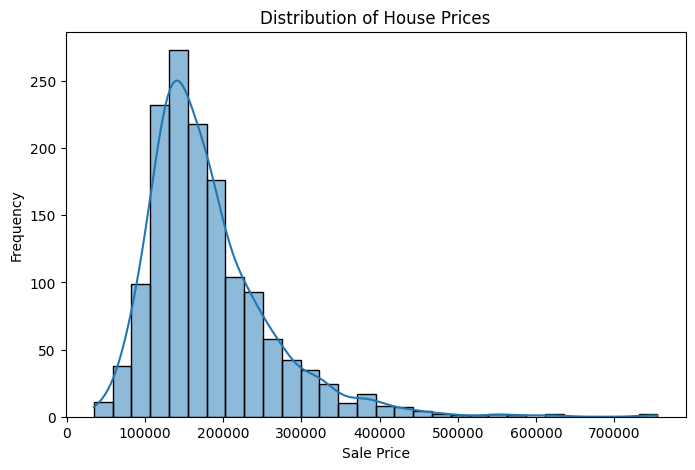

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Used for creating plots
import seaborn as sns  # Advanced visualization library

# Set figure size (width=8, height=5)
plt.figure(figsize=(8, 5))

# Create a histogram of SalePrice with 30 bins and a density curve
sns.histplot(train_data['SalePrice'], bins=30, kde=True)

# Add title and labels to the plot
plt.title('Distribution of House Prices')  # Title of the plot
plt.xlabel('Sale Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Show the plot
plt.show()


In [ ]:
# Calculate skewness

#Skewness > 1 → Highly skewed (log transformation recommended)
#Skewness between 0.5 - 1 → Moderately skewed (log transformation can help)
#Skewness < 0.5 → Almost normal (no need for transformation)

print("Skewness of SalePrice:", train_data['SalePrice'].skew())



Skewness of SalePrice: 1.8828757597682129


In [ ]:
# Apply Log Transformation: We use np.log1p() (log transformation) to reduce skewness

import numpy as np  # Importing NumPy for mathematical operations

# Apply log transformation
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])  # log(1 + SalePrice)


<ipython-input-17-de51d3fa067e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SalePrice'] = np.log1p(train_data['SalePrice'])  # log(1 + SalePrice)


In [ ]:
# loc[:, 'SalePrice'] ensures that we explicitly select the column for modification.
#It prevents Pandas from creating an unintended copy.

train_data.loc[:, 'SalePrice'] = np.log1p(train_data['SalePrice'])



In [ ]:
# If it prints True, it's a view, so modifications might not be applied correctly.
#If it prints False, it's a copy, meaning changes are safe.

print(train_data._is_view)


False


In [ ]:
train_data = train_data.copy()  # Ensure it's an independent DataFrame
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])


#**Visualizing the Transformed SalePrice**
After transformation, we plot the new distribution to check if it’s more normally distributed.

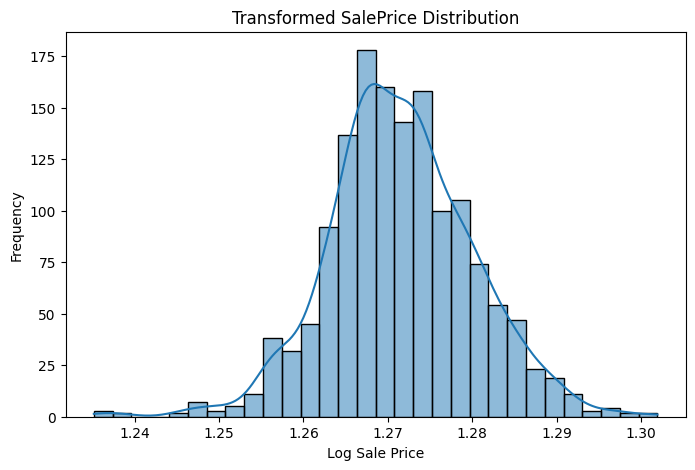

In [ ]:
import matplotlib.pyplot as plt  # Used for plotting graphs
import seaborn as sns  # Advanced visualization library

# Set figure size
plt.figure(figsize=(8, 5))

# Create histogram with density curve
sns.histplot(train_data['SalePrice'], bins=30, kde=True)

# Add title and labels
plt.title('Transformed SalePrice Distribution')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
# Check Skewness After Transformation

print("Skewness of SalePrice after transformation:", train_data['SalePrice'].skew())


Skewness of SalePrice after transformation: -0.0466440301499481


>A skewness value close to 0 means the data is nearly normally distributed.

>The log transformation successfully corrected the right skew in the original data.

>This improves model performance, especially for linear models like Linear Regression.










# **Handling Missing Values & Feature Engineering**

In [ ]:
# Handle numeric columns
df_numeric = df.select_dtypes(include=['number'])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# Handle categorical columns
df_categorical = df.select_dtypes(include=['object'])
df[df_categorical.columns] = df_categorical.fillna(df_categorical.mode().iloc[0])


In [ ]:
# Select relevant numeric features (excluding 'Id' and 'SalePrice')
X = df.drop(columns=['Id', 'SalePrice'])

# Target variable
y = df['SalePrice']


In [ ]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical columns


# **Splitting the Dataset into Train & Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


# **Evaluate Model Performance**


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 2368379990.7549
Mean Absolute Error (MAE): 32777.2488
R-Squared (R²): 0.3360


# **Visualize Predictions**

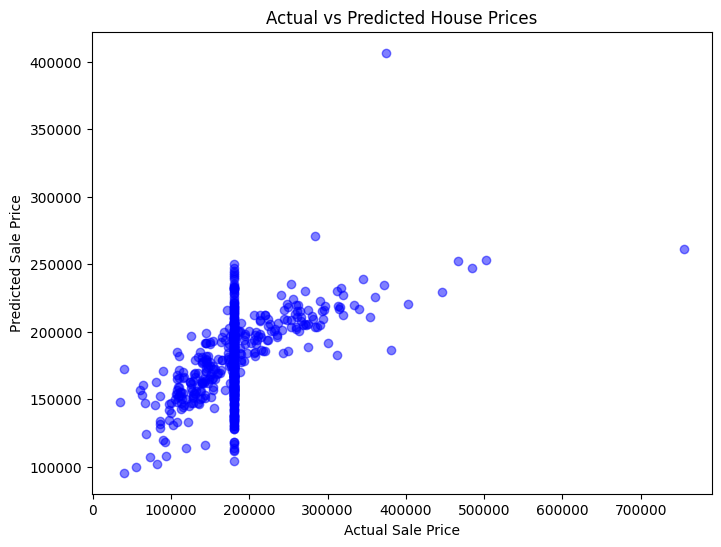

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


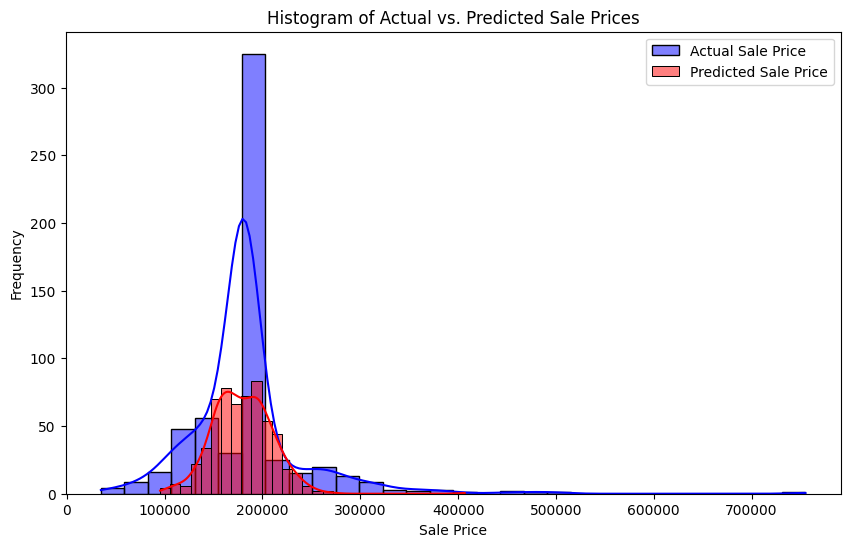

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot actual prices
sns.histplot(y_test, color="blue", label="Actual Sale Price", kde=True, bins=30)

# Plot predicted prices
sns.histplot(y_pred, color="red", label="Predicted Sale Price", kde=True, bins=30)

plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Histogram of Actual vs. Predicted Sale Prices")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# **Load and Preprocess Data**

In [ ]:
# Load dataset
file_path = "/content/HousePricePrediction.xlsx"  # Change path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Handle missing values
df_numeric = df.select_dtypes(include=['number'])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

df_categorical = df.select_dtypes(include=['object'])
df[df_categorical.columns] = df_categorical.fillna(df_categorical.mode().iloc[0])

# Select features & target
X = df.drop(columns=['Id', 'SalePrice'])
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numeric
y = df['SalePrice']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **1.Linear Regression**

Linear Regression - MSE: 2368321830.0716, MAE: 32777.0229, R²: 0.3360


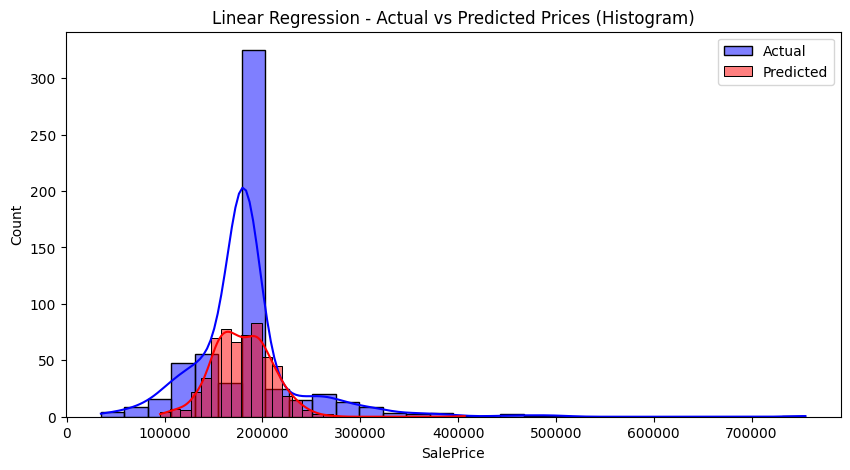

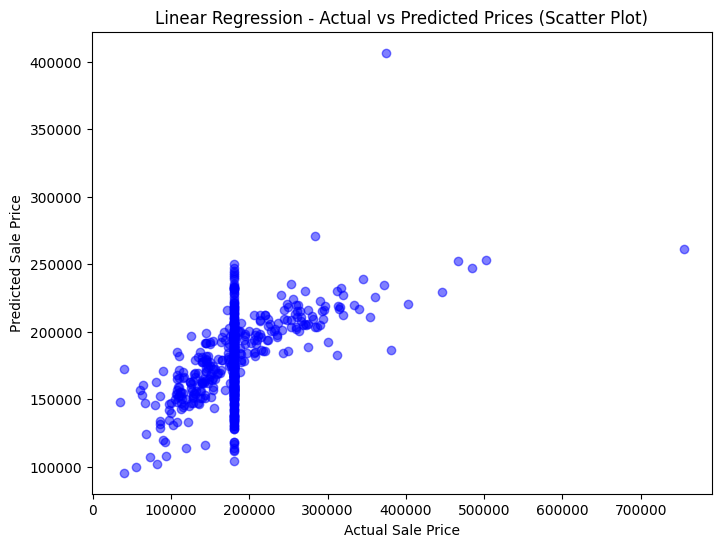

In [ ]:
# Train Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", label="Actual", kde=True, bins=30)
sns.histplot(y_pred_lr, color="red", label="Predicted", kde=True, bins=30)
plt.legend()
plt.title("Linear Regression - Actual vs Predicted Prices (Histogram)")
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression - Actual vs Predicted Prices (Scatter Plot)")
plt.show()


# **2. Decision Tree**


Decision Tree - MSE: 4890880174.5469, MAE: 41243.9520, R²: -0.3713


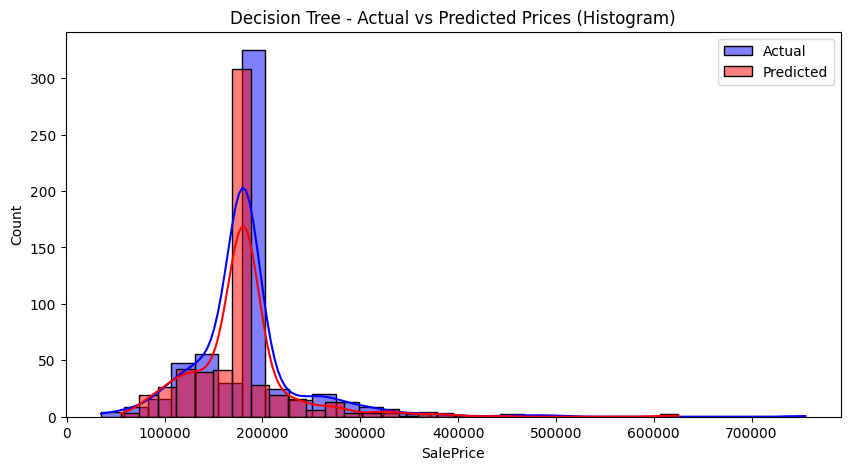

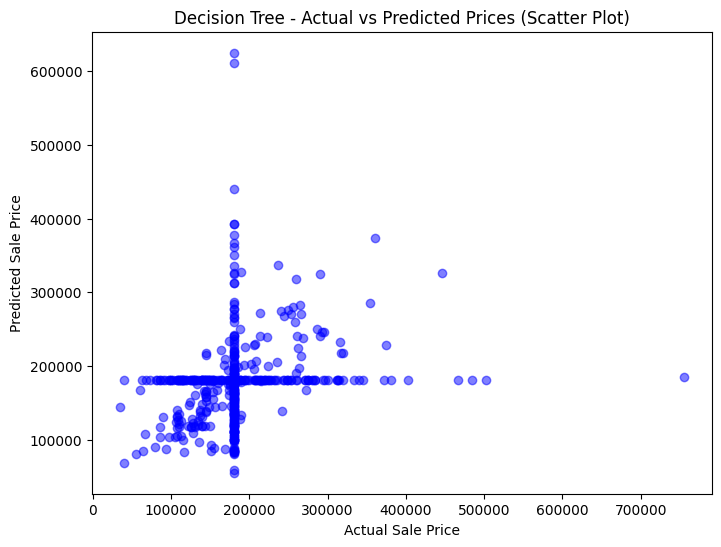

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", label="Actual", kde=True, bins=30)
sns.histplot(y_pred_dt, color="red", label="Predicted", kde=True, bins=30)
plt.legend()
plt.title("Decision Tree - Actual vs Predicted Prices (Histogram)")
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree - Actual vs Predicted Prices (Scatter Plot)")
plt.show()


# **3. Random Forest**


Random Forest - MSE: 2383780346.5940, MAE: 33422.2377, R²: 0.3317


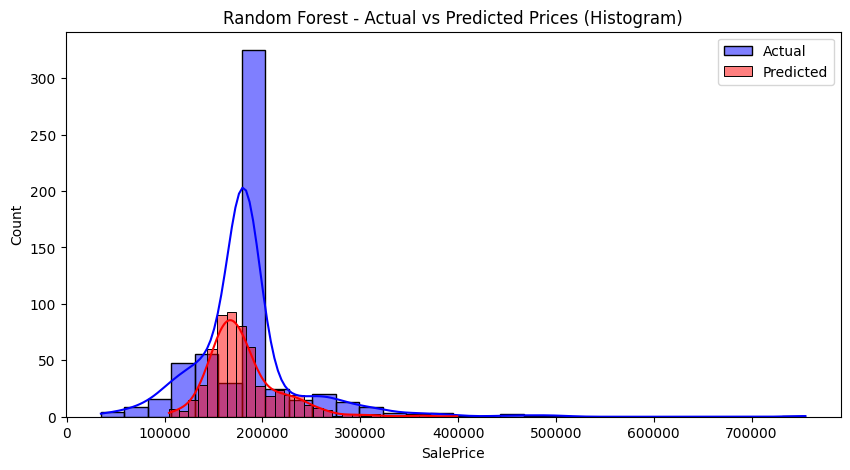

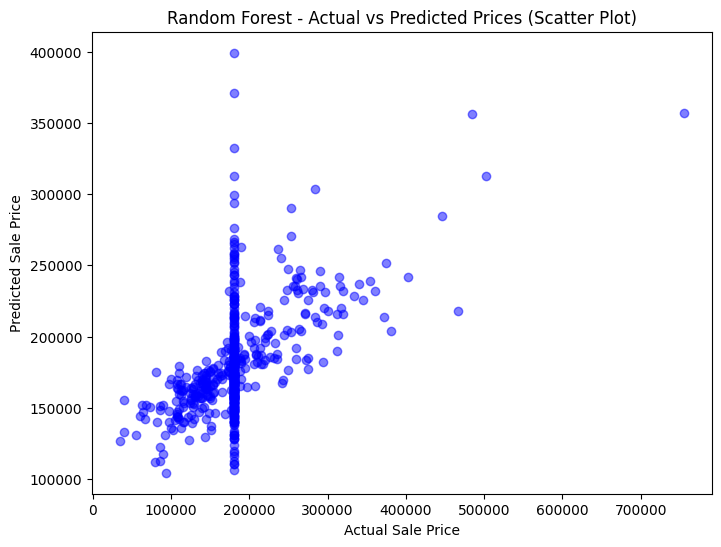

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", label="Actual", kde=True, bins=30)
sns.histplot(y_pred_rf, color="red", label="Predicted", kde=True, bins=30)
plt.legend()
plt.title("Random Forest - Actual vs Predicted Prices (Histogram)")
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest - Actual vs Predicted Prices (Scatter Plot)")
plt.show()


# **4.K-Nearest Neighbors (KNN)**

KNN - MSE: 2692759614.4718, MAE: 34981.6498, R²: 0.2450


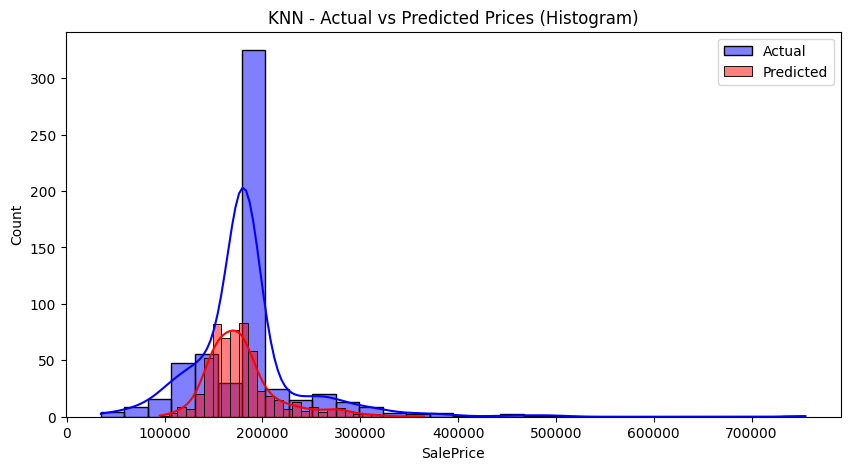

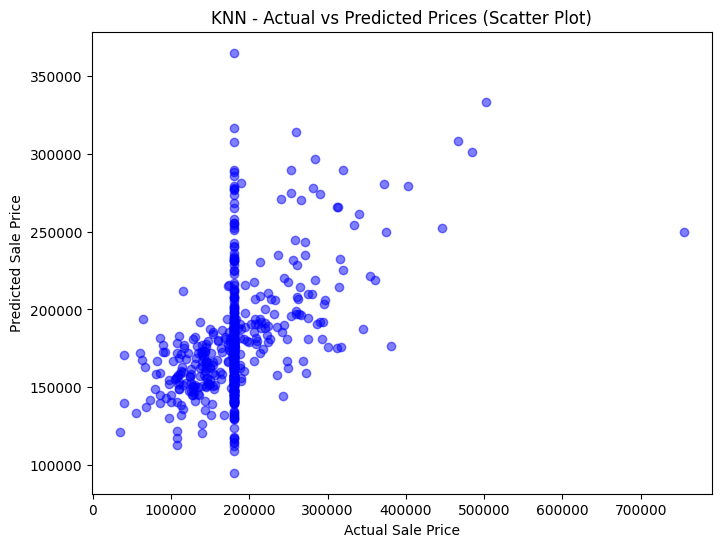

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", label="Actual", kde=True, bins=30)
sns.histplot(y_pred_knn, color="red", label="Predicted", kde=True, bins=30)
plt.legend()
plt.title("KNN - Actual vs Predicted Prices (Histogram)")
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("KNN - Actual vs Predicted Prices (Scatter Plot)")
plt.show()


               Model           MSE           MAE        R²   Best
0  Linear Regression  2.368322e+09  32777.022903  0.335993   True
1      Decision Tree  4.610297e+09  40538.467803 -0.292591  False
2      Random Forest  2.386839e+09  33466.851911  0.330801  False
3                KNN  3.029184e+09  34938.957200  0.150707  False


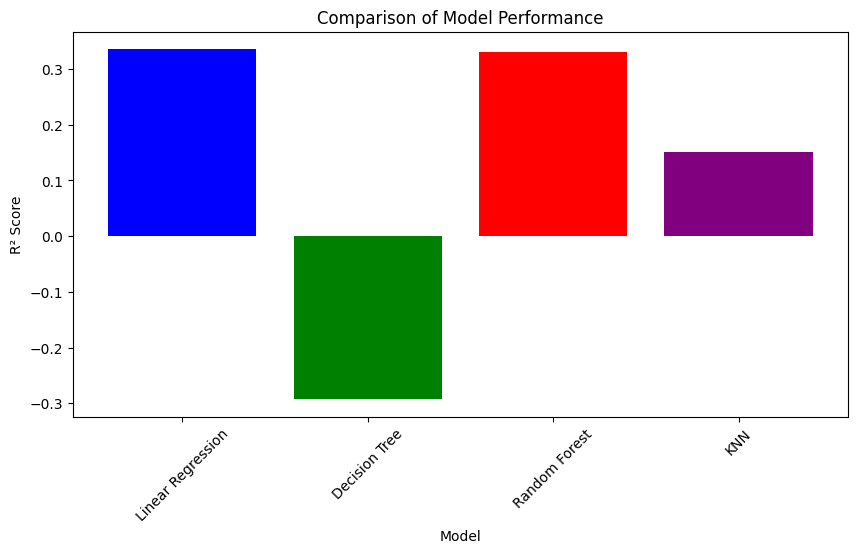

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R²"])

# Identify the best model (highest R²)
best_model = results_df.loc[results_df["R²"].idxmax(), "Model"]
results_df["Best"] = results_df["Model"] == best_model  # Mark best model

# Print results
print(results_df)

# Plot results using histogram
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["R²"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Comparison of Model Performance")
plt.xticks(rotation=45)
plt.show()

# **Predict House Prices**

In [ ]:
# Predict using trained models
y_pred_lr = model.predict(X_test)  # Linear Regression
y_pred_dt = model.predict(X_test)  # Decision Tree
y_pred_rf = model.predict(X_test)  # Random Forest
y_pred_knn = model.predict(X_test)  # K-Nearest Neighbors


In [ ]:
# Convert predictions and actual values into a DataFrame for easy comparison
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn
})

# Display first 10 rows
print(predictions_df.head(10))


      Actual Price  Linear Regression  Decision Tree  Random Forest  \
2437  180921.19589      166636.956712  166636.956712  166636.956712   
2470  180921.19589      149784.239178  149784.239178  149784.239178   
2359  180921.19589      169436.956712  169436.956712  169436.956712   
789   187500.00000      178152.717534  178152.717534  178152.717534   
1642  180921.19589      164968.478356  164968.478356  164968.478356   
196   311872.00000      182336.956712  182336.956712  182336.956712   
1543  180921.19589      162136.956712  162136.956712  162136.956712   
1270  260000.00000      212377.717534  212377.717534  212377.717534   
2473  180921.19589      171898.478356  171898.478356  171898.478356   
2073  180921.19589      152300.000000  152300.000000  152300.000000   

                KNN  
2437  166636.956712  
2470  149784.239178  
2359  169436.956712  
789   178152.717534  
1642  164968.478356  
196   182336.956712  
1543  162136.956712  
1270  212377.717534  
2473  171898.478356 

# **Load the Data & Handle Missing Values**

> Add blockquote



In [4]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/content/HousePricePrediction.xlsx")

# Fill missing values for categorical features with the mode (most frequent value)
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)

# Fill missing values for numerical features with the median
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median(), inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)


<ipython-input-4-ec6381d623c9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
<ipython-input-4-ec6381d623c9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [5]:
# Fix missing values for categorical columns
df.loc[:, 'MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df.loc[:, 'Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

# Fix missing values for numerical columns
df.loc[:, 'BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df.loc[:, 'TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())


# **Feature Engineering**

In [6]:
# Create a new feature: House Age
df['HouseAge'] = 2025 - df['YearBuilt']

# Create a new feature: Price per Sqft (for rows with SalePrice available)
df['Price_per_Sqft'] = df['SalePrice'] / df['LotArea']
df['Price_per_Sqft'] = df['Price_per_Sqft'].fillna(df['Price_per_Sqft'].median())




# **Model Training & Evaluation**

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['SalePrice'])  # Features (exclude target)
y = df['SalePrice']  # Target variable (House Price)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [18]:
# Show columns with non-numeric values
print(X_train.select_dtypes(include=['object']).columns)


Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


# **One-Hot Encoding** : Converts categorical into numerical values

In [19]:
import pandas as pd

# One-Hot Encoding for categorical features
X_train = pd.get_dummies(X_train, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], drop_first=True)

# Ensure train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


# **Handling missing values in y**

In [20]:
print(y_train.isnull().sum())



1166


In [21]:
# Fill NaN values in y_train with the median house price
y_train.fillna(y_train.median(), inplace=True)


In [22]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [23]:
print(y_train.isnull().sum())

0


# **Train a Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)


# **Evaluate Model Performance**

In [27]:
print(y_test.isnull().sum())  # Check NaNs in actual target values
print(pd.Series(y_pred).isnull().sum())  # Check NaNs in predictions


293
0


In [28]:
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]  # Keep only rows where y_test is not NaN


In [29]:
print(X_test.isnull().sum())


Id                     0
MSSubClass             0
LotArea                0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
BsmtFinSF2             0
TotalBsmtSF            0
HouseAge               0
Price_per_Sqft         0
MSZoning_FV            0
MSZoning_RH            0
MSZoning_RL            0
MSZoning_RM            0
LotConfig_CulDSac      0
LotConfig_FR2          0
LotConfig_FR3          0
LotConfig_Inside       0
BldgType_2fmCon        0
BldgType_Duplex        0
BldgType_Twnhs         0
BldgType_TwnhsE        0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
dtype: int64


In [30]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, MAE, and R² score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 3350642611.639609
Mean Absolute Error (MAE): 37887.87537142679
R-squared (R²): 0.5313614253737515


# **Feature Scaling (Standardization)**
Feature scaling ensures that all numerical features are on the same scale. Some models (like Linear Regression) assume that all input features have similar ranges, so without scaling, certain features might dominate others.

In [32]:
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler class

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Train a Random Forest Model**
Random Forest is an ensemble model that creates multiple decision trees and takes an average of their predictions. It is great for capturing non-linear relationships in data.

In [34]:
from sklearn.ensemble import RandomForestRegressor  # Import the Random Forest model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import evaluation metrics

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Calculate MAE
r2_rf = r2_score(y_test, y_pred_rf)  # Calculate R² score

# Print results
print(f"Random Forest Results:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Results:
Mean Squared Error (MSE): 288939806.32499963
Mean Absolute Error (MAE): 7964.919347079039
R-squared (R²): 0.9595873524324723


# **Compare Models (Linear Regression vs. Random Forest)**

In [36]:
# Store results in a DataFrame
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [mse, mse_rf],
    "MAE": [mae, mae_rf],
    "R² Score": [r2, r2_rf]
})

# Highlight the best model
results["Best"] = results["R² Score"] == results["R² Score"].max()

# Display results
print(results)


               Model           MSE           MAE  R² Score   Best
0  Linear Regression  3.350643e+09  37887.875371  0.531361  False
1      Random Forest  2.889398e+08   7964.919347  0.959587   True


In [37]:
# Convert y_test to DataFrame and reset index
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred_rf, columns=["Predicted Price"])

# Combine Actual Price, Predicted Price, and Area (LotArea or other relevant feature)
comparison_df = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)

# Keep only relevant columns
comparison_df = comparison_df[['LotArea', 'SalePrice', 'Predicted Price']]  # Modify based on your dataset

# Rename columns for better readability
comparison_df.columns = ['Area (Sq Ft)', 'Actual Price', 'Predicted Price']

# Display first 20 rows of the table
print(comparison_df.head(20))


    Area (Sq Ft)  Actual Price  Predicted Price
0          12205      187500.0        182403.10
1           9416      311872.0        336905.99
2          23595      260000.0        225927.14
3           8385      149900.0        151668.90
4           8791      207500.0        209557.50
5           9945      128500.0        128420.50
6          11218      189000.0        191743.23
7           6858      128000.0        125902.38
8          13346      268000.0        269697.88
9           7879       34900.0         53449.88
10         10944      271000.0        270956.80
11         10380      301000.0        301567.07
12          3964      151400.0        133834.72
13         11200      180000.0        182902.31
14          9790      143000.0        144231.50
15          7000      107500.0        111389.00
16         11645      260000.0        262164.60
17          8400      140000.0        141152.50
18          4230      208900.0        204583.08
19         11029      250000.0        24

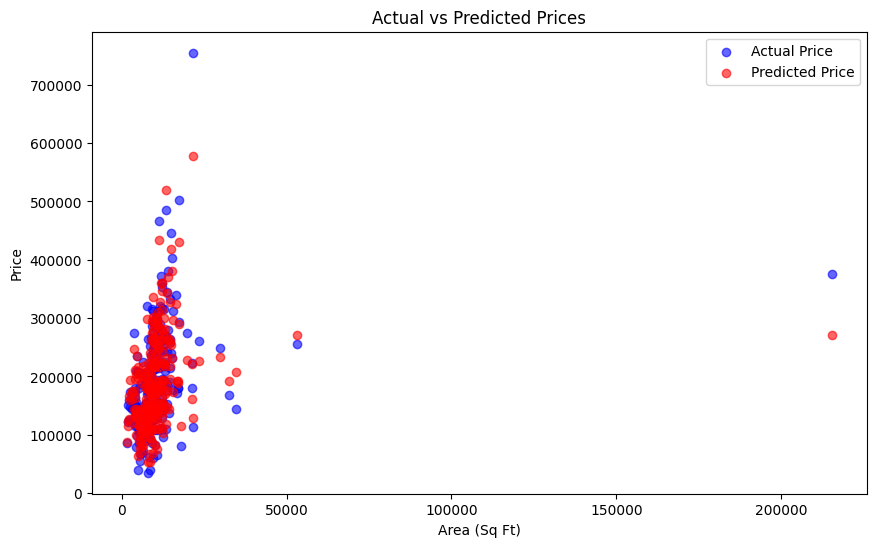

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(comparison_df["Area (Sq Ft)"], comparison_df["Actual Price"], color="blue", label="Actual Price", alpha=0.6)
plt.scatter(comparison_df["Area (Sq Ft)"], comparison_df["Predicted Price"], color="red", label="Predicted Price", alpha=0.6)
plt.xlabel("Area (Sq Ft)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()
